# get hastags

In [1]:
import pandas as pd


df_mab_raw = pd.read_excel("/Users/savioel2/Desktop/Ensovibep _covid_insights/Consolidated_data_Exc_News.xlsx")
dftwitter = df_mab_raw[df_mab_raw['SocialNetwork']=='TWITTER']
dftwitter.shape

(57231, 94)

In [2]:
import string 
def return_all_hashtags(tweets):
    tweetlist = []
    a = str(tweets)
    a = ''.join(filter(lambda x: x in string.printable, a))
    for tweet in a.split(' '):
        if tweet.startswith('#'):
            tweetlist.append(tweet.strip(','))
    return tweetlist

In [3]:
dftwitter['hastags'] = dftwitter.Message.apply(return_all_hashtags)
dftwitter[['Message','hastags']]

<ipython-input-3-d9e5eb2dff6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwitter['hastags'] = dftwitter.Message.apply(return_all_hashtags)


Message  \
0       RT @A_Phoenix_2000 #pune \n#Remdesevir #Tocili...   
1        @ravishndtv respected sir ,actemra 400mg inje...   
2       RT @mygovindia What medicines should you take ...   
3       RT @emollick The vaccines were not the only cr...   
5       RT @nagdev_gd @healthminmp I Need Help\nMy Wif...   
...                                                   ...   
128890  @PabloGRadio @JasonMerslich As I was saying (t...   
128891  That FDA approved? Not just emergency use auth...   
128892  RT @SweGringo His buddies doesn't get to steal...   
128893  Wait till they find out what’s in this antibod...   
128894  Who is investigating the pop-up IV infusion ce...   

                                                  hastags  
0       [#pune, #Tocilizumab, #COVIDEmergency, #Covidi...  
1                                                      []  
2         [#COVID19?, #COVIDVaccines, #IndiaFightsCorona]  
3                                                      []  
5                                                      []  
...                                                   ...  
128890                                                 []  
128891                                                 []  
128892                                                 []  
128893                                                 []  
128894                                                 []  

[57231 rows x 2 columns]

In [4]:
df_hashtags= dftwitter[dftwitter['Message'].str.contains('#')==True]
df_hashtags.shape

(16166, 95)

In [5]:
df_hashtags = df_hashtags[df_hashtags['hastags'].str.len()!= 0]
df_hashtags.shape

(15083, 95)

In [6]:
df_hashtags[['Message','hastags']]

Message  \
0       RT @A_Phoenix_2000 #pune \n#Remdesevir #Tocili...   
2       RT @mygovindia What medicines should you take ...   
6       A friend in Indore is still looking for Tocili...   
8       RT @PremSha23719235 Bro try this contacts! Con...   
11      RT @PremSha23719235 Here are the contact detai...   
...                                                   ...   
128837  This is accurate.  The Rongeneron monoclonal a...   
128864  #CaliforniaRecallElection Don't be a #DeathDeS...   
128867  A Day Late & Many Lost Lives Later, Flip-Flop ...   
128880   @GOP @RonDeSantisFL #DeathSantis you are such...   
128881  #Florida @TCPalm @MiamiHerald @SunSentinel @or...   

                                                  hastags  
0       [#pune, #Tocilizumab, #COVIDEmergency, #Covidi...  
2         [#COVID19?, #COVIDVaccines, #IndiaFightsCorona]  
6       [#IndoreFightsCorona\n#COVIDEmergency, #COVID1...  
8       [#CovidIndiaInfo, #COVIDSecondWaveInIndia, #Ch...  
11      [#Remdisivir, #Tocilizumab, #COVIDEmergency202...  
...                                                   ...  
128837                         [#COVID, #vaccine, #virus]  
128864  [#CaliforniaRecallElection, #DeathDeSantis., #...  
128867                                         [#COVID19]  
128880                                     [#DeathSantis]  
128881                           [#Florida, #RonDeSantis]  

[15083 rows x 2 columns]

In [7]:
tophastags = df_hashtags['hastags'].explode().dropna().value_counts().to_frame()
# tophastags = tophastags['hastags'].explode().dropna().value_counts().to_frame()
tophastags = tophastags.rename_axis('top_hashtags')
tophastags.head(30)

hastags
top_hashtags                  
#COVID19                  4366
#Tocilizumab              1063
#COVID                     686
#Leronlimab                576
#HIV                       495
#monoclonalantibodies      451
#Covid19                   441
#Covid                     375
#mAbs                      362
#covid                     360
#covid19                   328
#Remdesivir                313
#leronlimab                306
#AI                        300
#coronavirus               298
#SARSCoV2                  280
#DeathSantis               271
#NASH                      254
#LONGHAULERS               252
#COVID19.                  251
#DeltaVariant              241
#CYDY                      235
#WHO                       229
#lenzilumab                221
#Cancer                    220
#monoclonal                219
#MonoclonalAntibodies      212
#Regeneron                 195
#Covid_19                  189
#Florida                   189

In [18]:
tophastags = tophastags.head(20)

<BarContainer object of 15 artists>

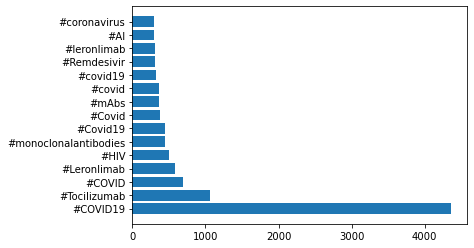

In [19]:
import numpy as np
from matplotlib import pyplot as plt
plt.barh(tophastags.index, tophastags["hastags"])

# word clouds

In [10]:
from wordcloud import WordCloud, STOPWORDS

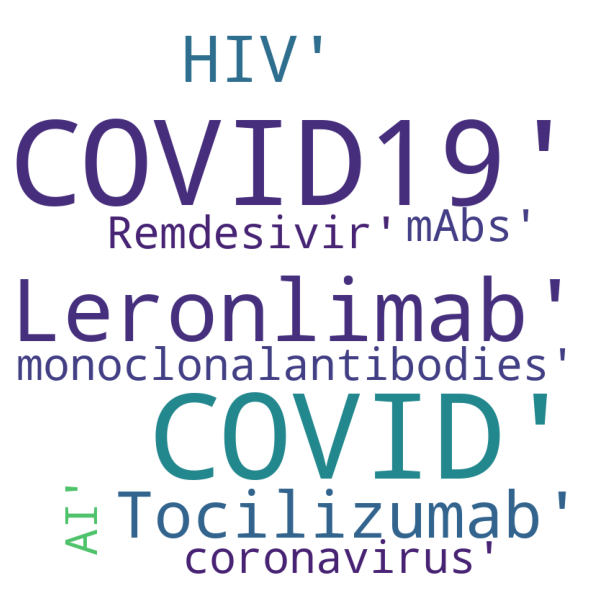

In [20]:
text = tophastags.index.values 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
           
            min_font_size = 10).generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# similarity search

In [37]:
shortlist = {'',
 'AD',
 'Abatacept',
 'Abbreviations',
 'Abrilumab',
 'Abstract',
 'Abstract_full',
 'Acknowledgment',
 'Acknowledgments',
 'Adalimumab',
 'Anakinra',
 'Analgesics',
 'Anti-TNF agents',
 'Anti-TNFα drugs',
 'Antibiotics',
 'Appendix',
 'Apremilast',
 'Assessments',
 'Authorship',
 'BCD-085',
 'BRAF KINASE',
 'BTK Inhibitors',
 'Background',
 'Baricitinib',
 'Bimekizumab',
 'Biologics',
 'Biosimilars',
 'Body',
 'Botulinum toxin',
 'Brazikumab',
 'Briakinumab',
 'Brodalumab',
 'CALCINEURIN',
 'CD11a',
 'CD20',
 'CD22',
 'CD4',
 'CD40L-CD40',
 'CD64',
 'CTLA4',
 'CTLA4/PD(L)1',
 'Cancers',
 'Cannabinoids',
 'Cardiology',
 'Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Certolizumab',
 'Chronic plaque',
 'Clinical trials',
 'Comorbidities',
 'Complement C5a',
 'Conclusion',
 'Conclusions',
 'Controversies',
 'Corticosteroids',
 'Counseling',
 'Cyclosporine',
 'DACTYLITIS',
 'DOI',
 'Data analyses',
 'Data extraction',
 'Data sharing',
 'Data source',
 'Deucravacitinib',
 'Diabetes',
 'Disclosure',
 'Disclosures',
 'Discussion',
 'Dupilumab',
 'ENTHESITIS',
 'Efficacy',
 'End points',
 'Ertapenem',
 'Etanercept',
 'Etrasimod',
 'Etrolizumab',
 'Extending the T',
 'Filgotinib',
 'Findings',
 'Flow cytometry',
 'Full_body_text',
 'Funding',
 'Funding sources',
 'Funding support',
 'Galectin-3',
 'Gel formulation',
 'Gene expression',
 'Gene therapy',
 'Genetic factors',
 'Glucocorticoids',
 'Golimumab',
 'Guselkumab',
 'Gαq',
 'HRQoL measures',
 'HS',
 'Hematology',
 'Hepatology',
 'Highlights',
 'Histology',
 'Hormonal agents',
 'Human studies',
 'IFX-1',
 'IL-1',
 'IL-1 Inhibitors',
 'IL-1 inhibitors',
 'IL-12 and IL-23',
 'IL-17',
 'IL-17 blockade',
 'IL-17 cytokines',
 'IL-17 in SpA',
 'IL-17A',
 'IL-1α',
 'IL-21',
 'IL-22',
 'IL-23',
 'IL-23 blockade',
 'IL-23 pathway',
 'IL-23/Th17 axis',
 'IL-36',
 'IL-5',
 'IL-6',
 'IL-6 Inhibitors',
 'IL-6 blockade',
 'Nanoemulsions',
 'Study design',
 'Study ethics',
 'Study selection',
 'Sulfasalazine',
 'Summary',
 'Surgery',
 'TD-1473',
 'TNF Inhibitors',
 'TNF antagonists',
 'TNF inhibitors',
 'TNF-α',
 'TNFα blockade',
 'Tapinarof',
 'Teaser',
 'Th17 cells',
 'Th17.1 cells',
 'Th22 cells',
 'Tildrakizumab',
 'Title',
 'Tocilizumab',
 'Tofacitinib',
 'Topical therapy',
 'Topicals',
 'Toxicity',
 'Treat to target',
 'Treatment goals',
 'Trends',
 'Triggers',
 'URL',
 'UVA1',
 'Zinc',
 'c-Kit',
 'full_text',
 'mTOR inhibitors',
 '\u202fTB Infection','result'}

In [40]:
from fuzzywuzzy import process

a = ['Title',
 'Body',
 'DOI',
 'URL',
 'Introduction',
 'Procedures',
 'Results',
 'Statistical analyses',
 'Study Design',
 'Study population',
 'Search',
 'Conclusion', 'results','Th17','IL-6'
  ]

b = shortlist

value_list = []
column_lst = set()
for name in a:
    value_list.append(process.extract(name, b, limit=10))

for values in value_list:
    for value in values: 
        if value[1] >80:
            column_lst.add(value[0])

column_list = list(column_lst)
column_list

['IL-23/Th17 axis',
 'Full_body_text',
 'IL-6',
 'result',
 'Th17 cells',
 'Statistics',
 'Search results',
 'IL-17 in SpA',
 'Conclusion',
 'IL-36',
 'Research agenda',
 'Th17.1 cells',
 'Conclusions',
 'IL-23 pathway',
 'Introduction',
 'Results',
 'Body',
 'DOI',
 'Search strategy',
 'IL-6 blockade',
 'Data analyses',
 'IL-17 cytokines',
 'Title',
 'Procedures',
 'URL',
 'Study Design',
 'IL-1 Inhibitors',
 'Interleukin-6',
 'Study design',
 'IL-6 inhibitors',
 'IL-6 Inhibitors']

# google serp api

In [1]:
!pip install google-search-results

  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25790 sha256=360b4bcbf8986140b9539f5a7f6d581c942db080b62797881e2ad7a7a50328b9
  Stored in directory: /Users/savioel2/Library/Caches/pip/wheels/ea/58/9e/3d89ebff948ef9ce0a6e056a8279c1f93c76993387766f8387
Successfully built google-search-results


In [8]:
from serpapi import GoogleSearch

params = {
  "engine": "google",
  "q": "inclisiran",
  "api_key": "8516f64ded472008dc5a3e50dcf0771465d4fe1ff017ab65422b7ee115082f07"
}

search = GoogleSearch(params)
results = search.get_dict()
organic_results = results['organic_results']

https://serpapi.com/search


In [9]:
organic_results

[{'position': 1,
  'title': 'FDA approves Novartis Leqvio® (inclisiran), first-in-class ...',
  'link': 'https://www.novartis.com/news/media-releases/fda-approves-novartis-leqvio-inclisiran-first-class-sirna-lower-cholesterol-and-keep-it-low-two-doses-year',
  'displayed_link': 'https://www.novartis.com › news › media-releases › fda...',
  'snippet': 'FDA approves Novartis Leqvio® (inclisiran), first-in-class siRNA to lower cholesterol and keep it low with two doses a year. Dec 22, 2021.',
  'rich_snippet': {'top': {'extensions': ['by J Reinhardt —']}},
  'about_this_result': {'source': {'description': 'Novartis International AG is a Swiss multinational pharmaceutical corporation based in Basel, Switzerland. It is one of the largest pharmaceutical companies in the world.',
    'source_info_link': 'https://en.wikipedia.org/wiki/Novartis',
    'security': 'secure',
    'icon': 'https://serpapi.com/searches/61decc2f0a90c78b3a2c601b/images/1f393435abdbafb4edb3bed37f7e07bb094c2e882c96ad0103

In [12]:
from serpapi import GoogleSearch

params = {
  "engine": "google_autocomplete",
  "q": "inclisiran",
  "hl": "en",
  "gl": "us",
  "api_key": "8516f64ded472008dc5a3e50dcf0771465d4fe1ff017ab65422b7ee115082f07"
}

search = GoogleSearch(params)
results = search.get_dict()
suggestions = results['suggestions']

https://serpapi.com/search


In [13]:
suggestions

[{'value': 'inclisiran fda approval', 'relevance': 1250, 'type': 'QUERY'},
 {'value': 'inclisiran novartis', 'relevance': 1000, 'type': 'QUERY'},
 {'value': 'inclisiran mechanism of action',
  'relevance': 601,
  'type': 'QUERY'},
 {'value': 'inclisiran pdufa', 'relevance': 600, 'type': 'QUERY'},
 {'value': 'inclisiran fda approval 2021', 'relevance': 553, 'type': 'QUERY'},
 {'value': 'inclisiran approval', 'relevance': 552, 'type': 'QUERY'},
 {'value': 'inclisiran cost', 'relevance': 551, 'type': 'QUERY'},
 {'value': 'inclisiran fda', 'relevance': 550, 'type': 'QUERY'}]